# Nsaba Walkthrough

Nsaba is a tool that can be used to compare gene expression in brain regions associated with terms often used in the neuroscience literature. 

In other words, this toolbox can ask questions such as, "Is the D2 receptor expressed significantly higher in brain regions that are activated in studies that talk about 'reward'?"

In this notebook I will demonstrate some of the functionality of the Nsaba toolbox to explore the relationship between D2 receptors and reward. 

In [6]:
# settings and modules
%config InlineBackend.figure_format = 'retina'
#%pylab inline
from nsaba import *
import nsaba.nsaba.geneinfo
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import itertools


The nsaba library contains a class called Nsaba() that has all of the base functionality of loading and organizing genetic expression and activation data.
The module also contains a few other modules:
* Analysis: tools to perform coorelations and ttests on genetic expression and activation.
* Visualizer: tools to visualize relationships between genetic expression and activation.
* Builder: tools to build and save static matrices of genetic expression and activaion.
* geneinfo: tools to querry the NIH gene database to get information about genes

In the next cell I will load all of the genetic epxression and activation data for all Nsaba classes and initialize a Nsaba object N 

In [7]:
ns_path = "/Users/Torben/Documents/ABI analysis/current_data_new/"
#ns_path = '/Users/SP/Documents/'
aba_path = '/Users/Torben/Documents/ABI analysis/normalized_microarray_donor9861/'
#aba_path = '/Users/SP/Documents/'
#nsaba.Nsaba.aba_load(aba_path)
nsaba.nsaba.Nsaba.ns_load(ns_path)
nsaba.nsaba.Nsaba.aba_load(aba_path)
N = nsaba.nsaba.Nsaba()
N.load_ge_pickle(pkl_file='/Users/Torben/Documents/ABI analysis/normalized_microarray_donor9861/Nsaba_ABA_ge.pkl')

This may take a minute or two ...
database.txt loaded.
features.txt loaded.
Nsaba.ns['mni_coords'] initialized.

This may take a minute or two ...
SampleAnnot.csv loaded.
MicroarrayExpression.csv loaded.
Probes.csv loaded.
Nsaba.aba['mni_coords'] initialized.

This may take a minute or two ...
'ge' dictionary successfully loaded


### Gathering data for two genes and two terms
* 'Reward' and 'Motivation' - Words used to describe behaviors associated with basal ganglia circuitry
* entrez ID: 1813 - DRD2, the D2 dopamine receptor
* entrez ID: 6531 - SLC6A3, a gene that encodes the dopamine transporter

It takes a long time to estimate activation at points where there is data for genetic expression. This happens because for every study that NeuroSynth has activation data there are multiple coordinates of activation. Additionally, there are often multiple studies that show activation in identical coordinates. This, and estimating activation in unknown points using nearby known points takes a long time. The thresh parameter in get_ns_act can load a subset of the studies. Setting it at -1 loads all studies. 

In [8]:
term1 = 'reward'
term2 = 'motivation'
genes = [1813 , 6531]
nsaba.nsaba.geneinfo.gene_info(str(genes[0]))
nsaba.nsaba.geneinfo.gene_info(str(genes[1])) 

N.get_ns_act(term1, thresh=-1, method='knn')
N.get_ns_act(term2, thresh=-1, method='knn')

This may take a few minutes...
This may take a few minutes...


The Nsaba() class has the following methods:


**Useful Methods:**

* get_ns_act(myterm, thresh=-1, method='knn', search_radii=3, k=None): Estimates activation for a term at all points where we have genetic expression data. Thresh sets a minimum value for activation data to load. higher thresh values speed up runtime but are less reflective of varience in the data. Sphere or knn methods can be chosen to estimate activation where the search radius (in voxels) or k nearest neighboring points can be chosen. This data is saved in self.term[myterm]["ns_act_vector"] 

* get_aba_ge([genes]): loads the gene activation at the coordinates where there is data in the ABA. This data is saved as self.ge[yourgene]

* make_ge_ns_mat(ns_term, entrez_ids): makes a matrix of gene expression and activation of a term where there was data close enough to estimate. Entries on the same row are at the same coordinate.

* coords_to_term([(x,y,z),(x,y,z),...],term,search_radii=5): returns the mean activation of a term for a list of coordinates. If there is no data at a coordinate. Activation is estimated using the knn method (described below).

* coords_to_ge(coords, entrez_ids, search_radii=5, k=20): returns the mean expression of a gene for a list of genes. If there is no data at a coordinate. Expression is estimated using the knn method (described below).

**Initialization methods:**

* aba_load(aba_path='.', csv_names=None): loads data from the ABA into dataframes.

* ns_load(ns_path='.', ns_files=None): loads data from NS into dataframes.

* _check_static_members(): really a bookkeeping method. Reminds the user to run aba_load and ns_load before doing anything 


* load_ge_pkl(pkl_file="Nsaba_ABA_ge.pkl", output_dir='.'): loads a previously saved pkl file of genetic expression. Faster than ns_load for a series of genes.

* pickle_ge(pkl_file="Nsaba_ABA_ge.pkl", path='.'): loads a previously saved pkl file.

**Bookkeeping methods:**

* check_entrez_struct(entrez_ids): checks that entrez_id's are entered in the correct format

* is_term(term): checks that a term exists in the NS term library

* is_coord((x,y,z)): checks if a coordinate set has a matching neurosynth study ID

* is_id(study_id): checks if a study ID matches the Neurosynth database. The two dataframes, one with coordinates and one with activation vectors have some mismatched ID's.

* coord_to_ids((x,y,z)): finds study IDs with coordinates that match (x,y,z)

* coord_to_terms((x,y,z)): returns the mean activation of all terms at coordinates (x,y,z). If there is no activation data at these coordinates, it returns []

* _coord_to_ge(coord, ids, search_radii, k): returns the estimated gene expression of a gene at a coordinate using the knn method (described below)

* _id_to_terms(study_id): returns the vector of term activations for a NS study

* id_to_coords. Not a method. Use id_dict.

* _term_to_coords(term, thresh=0): returns coordinates where a term activation is above a given threshold. set thresh to -1 for all activation.

* _sphere, _sphere_method: used together to estimate expression or activation using nearby points by drawing spheres of increasing size and weighting them by distance to the seeded point

* _knn, _knn_method: used together to estimate expression or activation using nearby points using K-nearest-neighbors method. Faster than sphere.

* ns_load_id_dict(): builds a dictionary of NS study ids with their corresponding coordinates. Helpful for NS methods where lots of overlapping data has to be accessed. 

* set_ns_weight_f(f): sets the weighting metric for how to weight nearby activation when estimating NS activation of an unknown point.


In [25]:
N.coords_to_term([(1,2,3),(4,5,6),(1,1,-1)],'reward')

IndexError: list index out of range

### Visualizing  gene expression of one gene

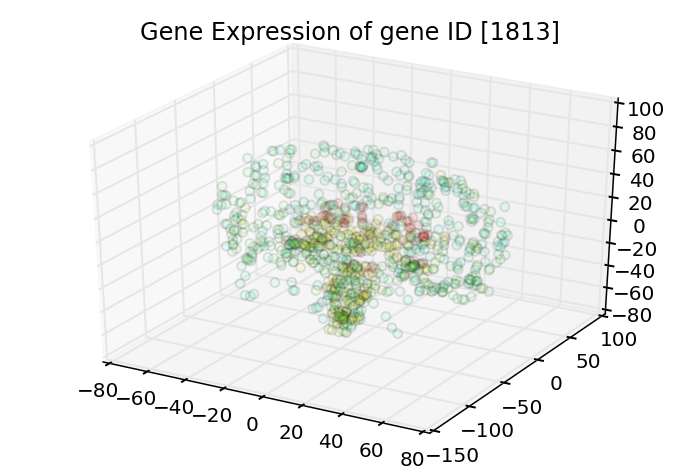

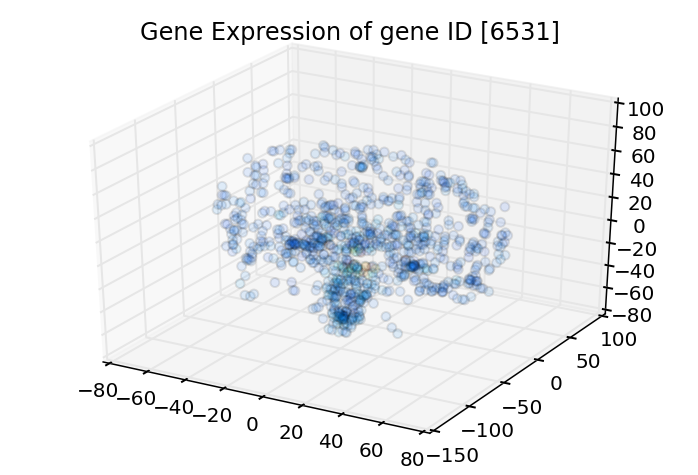

In [4]:
from nsaba.nsaba.visualizer import NsabaVisualizer
V = NsabaVisualizer(N)
V.visualize_ge([genes[0]])
V.visualize_ge([genes[1]])

#Plotting activation of 1 term

This could take a minute


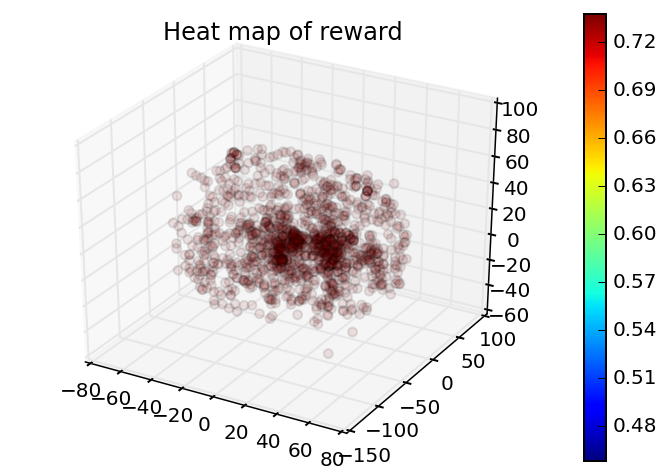

In [5]:
V.visualize_ns('reward',no_ids = 50)

ooo


#Plotting the correlation between two genes

(array([[ 1.        ,  0.35283388],
        [ 0.35283388,  1.        ]]),
 [0.33555195928373605, 1.3717596592325352])

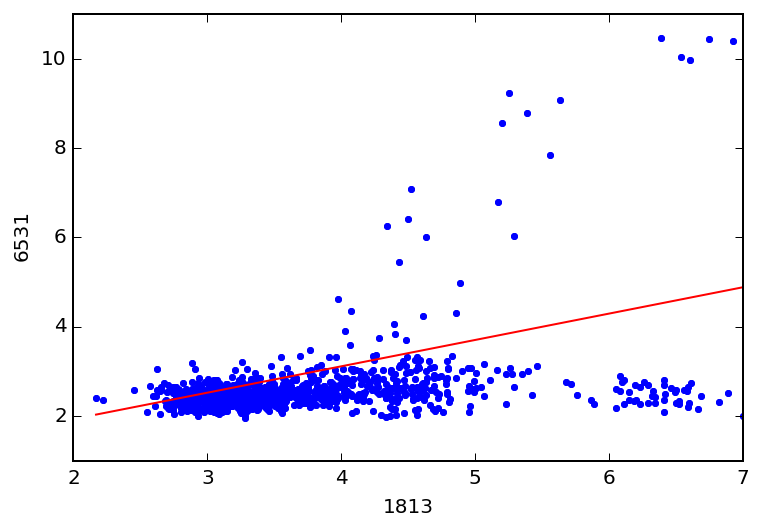

In [13]:
V.visualize_ge_ge(genes)

#Plotting correlation between two terms

(array([[ 1.        ,  0.14570579],
        [ 0.14570579,  1.        ]]),
 [0.072167405298738455, 0.0016106915227061878])

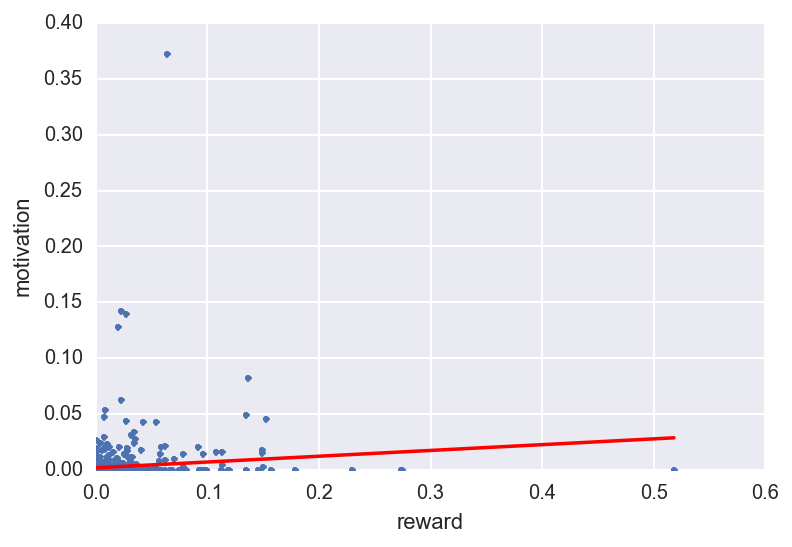

In [8]:
V.visualize_ns_ns(term1,term2)

### Correlating activation of one term with expression of one gene

(array([[ 1.        ,  0.06368729],
        [ 0.06368729,  1.        ]]),
 [0.0025777445159347288, 0.0033018573698162246])

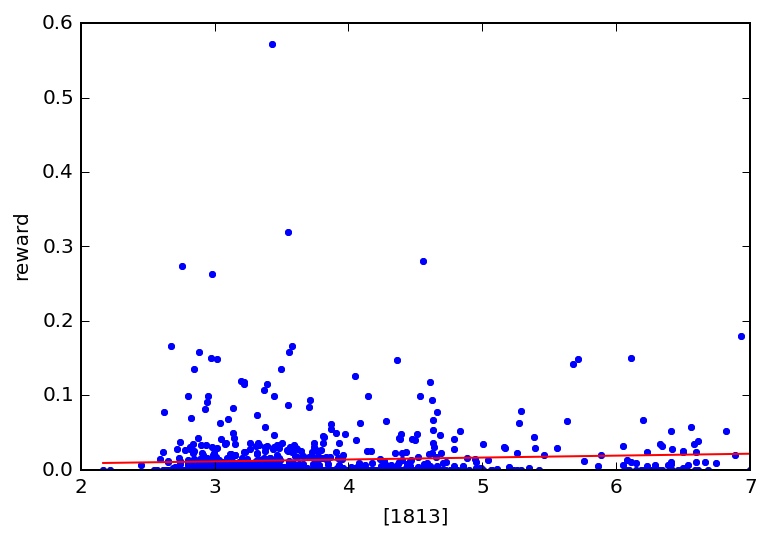

In [15]:
V.visualize_ns_ge('reward',[genes[0]])

To use inline plotting functionality in Jupyter, '%matplotlib inline' must be enabled
t-value: -3.6482 
p-value: 2.789E-04
Effect size: -0.3361 



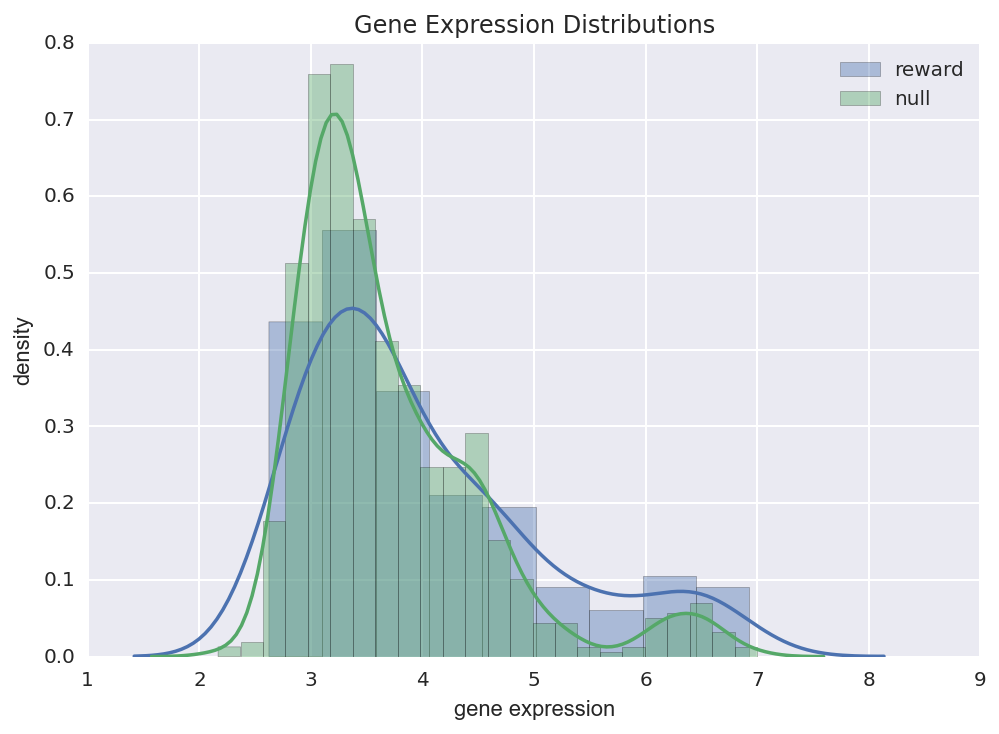

In [17]:
from nsaba.nsaba.analysis import NsabaAnalysis

A = NsabaAnalysis(N)
A.t_test('reward',genes[0])

In [19]:
tttest_metrics = A.t_test_multi('reward')

This may take a couple of minutes ...


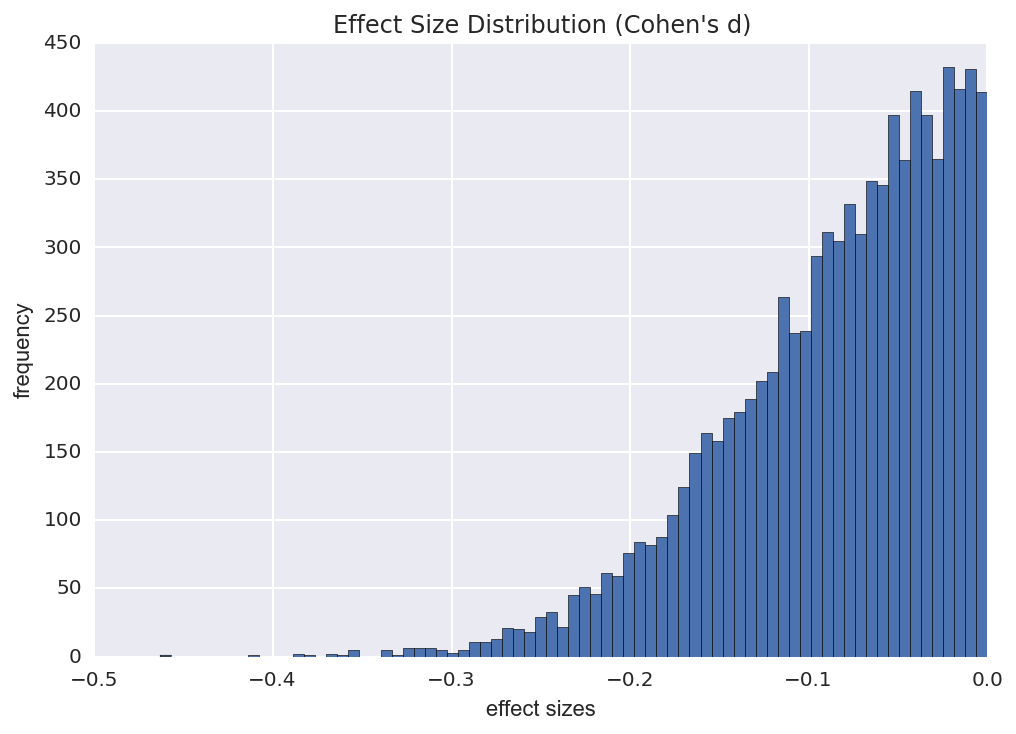

In [20]:
A.effect_size_distr(tttest_metrics)

In [21]:
A.fetch_gene_descriptions(tttest_metrics)

Fetching NIH gene descriptions ...
392197.0 isn't registered with the NIH
341.0 isn't registered with the NIH
886.0 isn't registered with the NIH
134391.0 isn't registered with the NIH
79413.0 isn't registered with the NIH


KeyboardInterrupt: 

341.0